In [ ]:
# Import necessary libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [114]:
# Set seed for reproducibility
np.random.seed(11)

# Define time steps (50 periods)
periods = 50
time = np.arange(periods)

# Create seasonal pattern using sine wave (cycle every 12 steps)
seasonal_pattern = np.sin(2 * np.pi * time / 12)

# Linear trend (increases by 0.1 per time step)
trend = time * 0.1

# Add random noise (normal distribution with mean 0 and std 0.5)
noise = np.random.normal(0, 0.5, size=periods)

# Combine seasonality, trend, and noise into the final synthetic dataset
data = seasonal_pattern + trend + noise

# Convert to pandas DataFrame for easy handling
df = pd.DataFrame(data, columns=['value'])

# Set 'time' as index for time series analysis
df['time'] = time
df.set_index('time', inplace=True)

In [110]:
# EDA

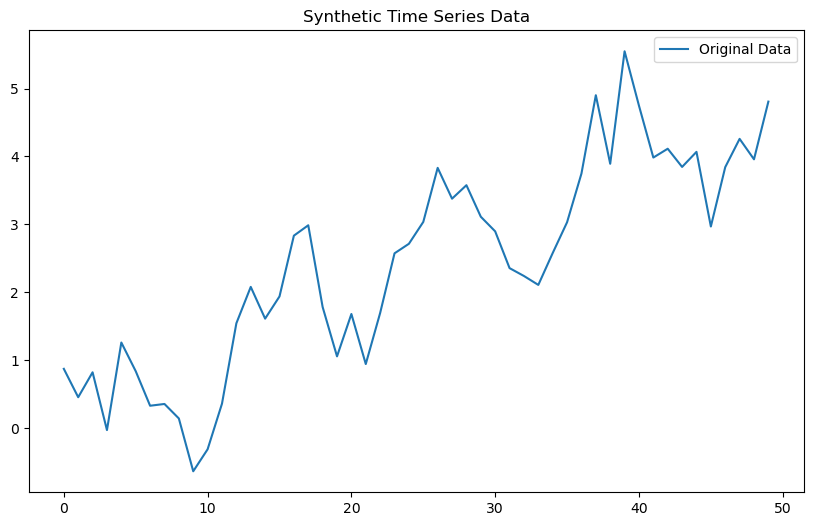

In [115]:
# original dataset
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Original Data')
plt.title("Synthetic Time Series Data")
plt.legend()
plt.show()

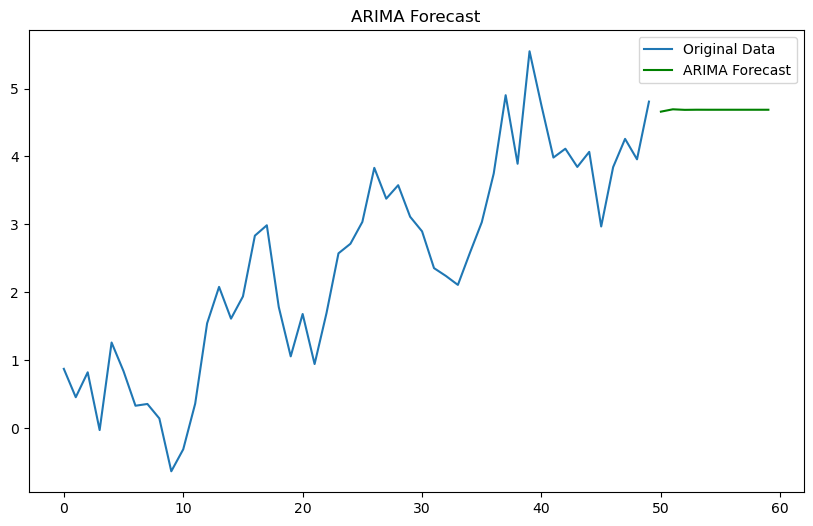

In [116]:
# Fit ARIMA model (order p=1, d=1, q=1)
arima_model = ARIMA(df['value'], order=(1,1,1))
arima_result = arima_model.fit()

# Predict with ARIMA
arima_forecast = arima_result.forecast(steps=10)

# Plot the ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Original Data')
plt.plot(np.arange(periods, periods+10), arima_forecast, label='ARIMA Forecast', color='green')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()


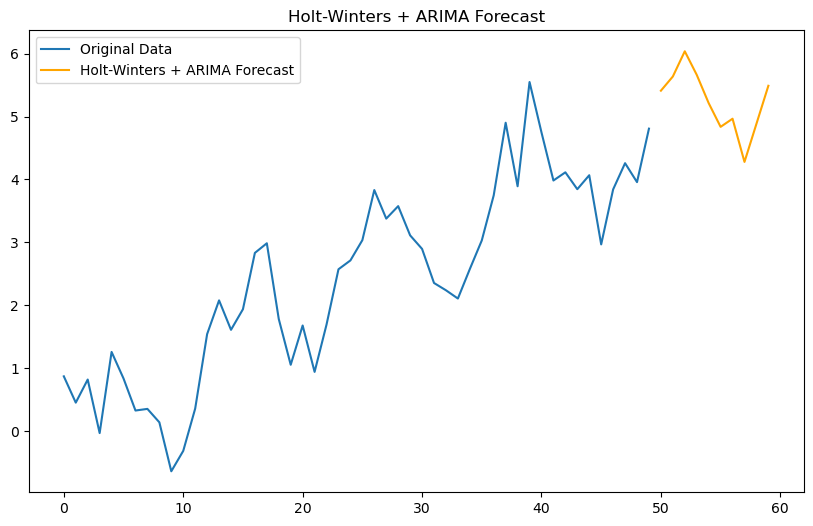

In [117]:
# Fit Holt-Winters model (additive approach)
# note: multiplicative approach assumes that the seasonal and trend effects multiply with the level
hw_model = ExponentialSmoothing(df['value'], seasonal='add', seasonal_periods=12, trend='add').fit()

# Use ARIMA for forecasting with residuals from Holt-Winters
hw_arima_resid = ARIMA(hw_model.resid, order=(1,1,1)).fit()

# Holt-Winters + ARIMA predictions
hw_arima_forecast = hw_arima_resid.forecast(steps=10) + hw_model.forecast(steps=10)

# Holt-Winters + ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Original Data')
plt.plot(np.arange(periods, periods+10), hw_arima_forecast, label='Holt-Winters + ARIMA Forecast', color='orange')
plt.title("Holt-Winters + ARIMA Forecast")
plt.legend()
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.63858D-01    |proj g|=  2.85678D-01

At iterate    5    f=  6.37909D-01    |proj g|=  2.25635D-02

At iterate   10    f=  6.26442D-01    |proj g|=  7.57076D-03

At iterate   15    f=  6.26367D-01    |proj g|=  9.77517D-04

At iterate   20    f=  6.26363D-01    |proj g|=  2.42963D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   2.681D-05   6.264D-01
  F =  0.62636306818670628     

CONVERG

 This problem is unconstrained.


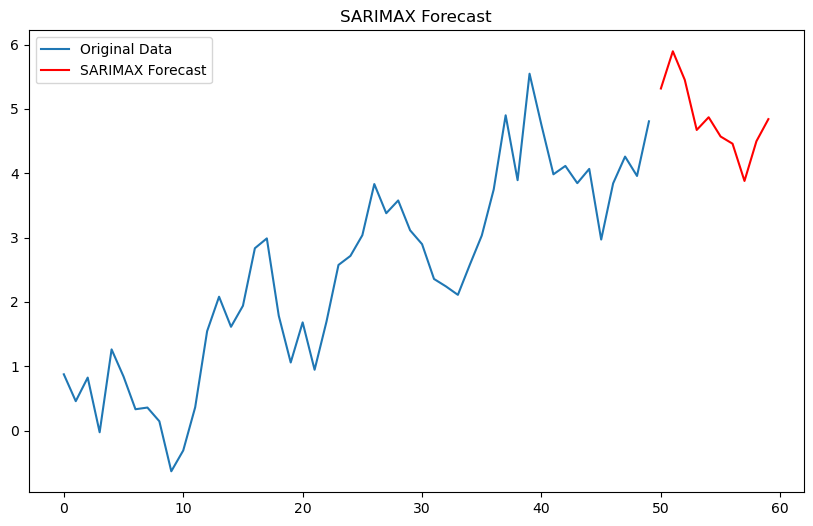

In [118]:
# Fit SARIMAX model (order p=1, d=1, q=1) with seasonality (P=1, D=1, Q=1, 12)
sarimax_model = SARIMAX(df['value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_result = sarimax_model.fit()

# Predict with SARIMAX
sarimax_forecast = sarimax_result.forecast(steps=10)

# SARIMAX predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Original Data')
plt.plot(np.arange(periods, periods+10), sarimax_forecast, label='SARIMAX Forecast', color='red')
plt.title("SARIMAX Forecast")
plt.legend()
plt.show()


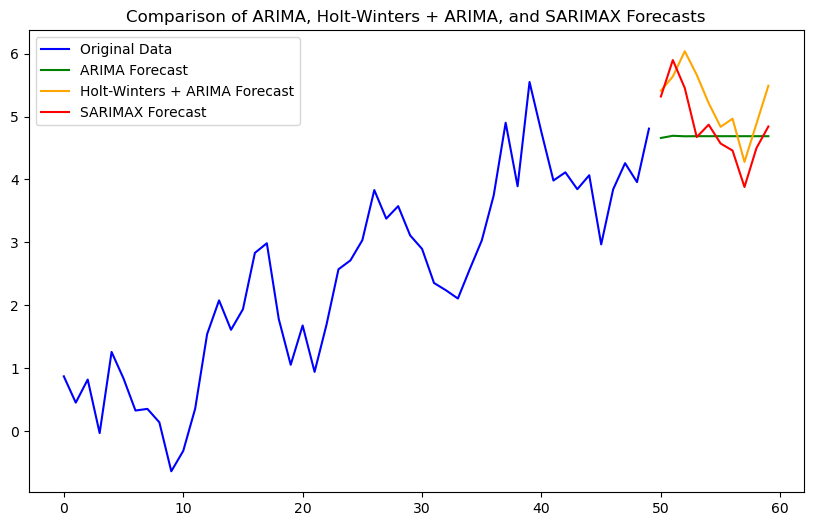

In [119]:
# Plot the original data and the forecasts together on the same graph
plt.figure(figsize=(10, 6))

# original data
plt.plot(df.index, df['value'], label='Original Data', color='blue')

# ARIMA forecast
plt.plot(np.arange(periods, periods + 10), arima_forecast, label='ARIMA Forecast', color='green')

# Holt-Winters + ARIMA forecast
plt.plot(np.arange(periods, periods + 10), hw_arima_forecast, label='Holt-Winters + ARIMA Forecast', color='orange')

# SARIMAX forecast
plt.plot(np.arange(periods, periods + 10), sarimax_forecast, label='SARIMAX Forecast', color='red')

# title and legend
plt.title("Comparison of ARIMA, Holt-Winters + ARIMA, and SARIMAX Forecasts")
plt.legend()

# graph
plt.show()


In [ ]:
# Need to train on testing split 80/20, plot and take metrics for predictions vs testing data.